In [26]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import matplotlib.patches as mpatches

In [27]:
# Dictionary allows us to easily just type our value and get the state rather than remembering the index value

state_conversion = {
    'flammable': 0,
    'growing': 1,
    'burnt': 2,
    'burning': 3,
}

In [28]:
def plot_board(board):
    display_board = np.zeros((board.shape[1], board.shape[2], 3))  # RGB for color

    # Define color mappings
    flammable_color = [0.1, 0.7, 0.2]  # Green
    growing_color = [0, 0, 1]    # Blue
    burnt_color = [0, 0, 0]      # Black
    burning_color = [1, 0, 0]    # Red

    # Apply colors based on cell states
    display_board[board[state_conversion['flammable']] == 1] = flammable_color
    display_board[board[state_conversion['growing']] == 1] = growing_color
    display_board[board[state_conversion['burnt']] == 1] = burnt_color
    display_board[board[state_conversion['burning']] == 1] = burning_color

    plt.imshow(display_board)
    plt.axis('off')  # Hide axes for better visual
    # Legend

    flammable_patch = mpatches.Patch(color=flammable_color, label='Flammable')
    growing_patch = mpatches.Patch(color=growing_color, label='Growing')
    burnt_patch = mpatches.Patch(color=burnt_color, label='Burnt')
    burning_patch = mpatches.Patch(color=burning_color, label='Burning')

    plt.legend(handles=[flammable_patch, growing_patch, burnt_patch, burning_patch], 
               loc="upper right", title="Cell States")
    plt.show()

In [29]:
def get_cell(board: np.array, state: str, row: int, col: int) -> np.array:
    cell_state = state_conversion[state]
    
    return board[cell_state][row % board.shape[1]][col % board.shape[2]]

def set_cell(board, state, row, col, value):
    cell_state = state_conversion[state]

    board[cell_state][row % board.shape[1]][col % board.shape[2]] = value
    return board

def is_flammable(board, row, col):
    return board[0][row][col]

def is_growing(board, row, col):
    return board[1][row][col]

def is_burnt(board, row, col):
    return board[2][row][col]

def is_burning(board, row, col):
    return board[3][row][col]

In [30]:
def has_burning_neighbor(board, row, col):
    for i in range(-1, 2):         # Checking surrounding rows
        for j in range(-1, 2):     # Checking surrounding columns
            if i == 0 and j == 0:  # Skip the cell itself
                continue
            # Check bounds to ensure we don’t go out of bounds
            neighbor_row = (row + i) % board.shape[1]
            neighbor_col = (col + j) % board.shape[2]
            if is_burning(board, neighbor_row, neighbor_col):
                return True
    return False

In [31]:
def start_fire(board_size, p):
    random_cells = np.random.rand(board_size[1],board_size[2])
    board = np.zeros(board_size[1:])
    board[random_cells > 1-p] = 1
    return board

In [32]:
def step(large_board):
    board_size = large_board.shape
    next_board = large_board.copy()  # Use a copy to avoid modifying while iterating

    for i in range(board_size[1]):
        for j in range(board_size[2]):
            # Rule 1: Flammable cell with at least one burning neighbor becomes burning
            if is_flammable(large_board, row=i, col=j) and has_burning_neighbor(large_board, row=i, col=j):
                next_board = set_cell(next_board, state='flammable', row=i, col=j, value=0)
                next_board = set_cell(next_board, state='burning', row=i, col=j, value=1)

            # Rule 2: Burning cell becomes burnt
            if is_burning(large_board, row=i, col=j):
                next_board = set_cell(next_board, state='burning', row=i, col=j, value=0)
                next_board = set_cell(next_board, state='burnt', row=i, col=j, value=1)

            # Rule 3: Burnt cell becomes growing
            if is_burnt(large_board, row=i, col=j):
                next_board = set_cell(next_board, state='burnt', row=i, col=j, value=0)
                next_board = set_cell(next_board, state='growing', row=i, col=j, value=1)

            # Rule 4: Growing cell becomes flammable
            if is_growing(large_board, row=i, col=j):
                next_board = set_cell(next_board, state='growing', row=i, col=j, value=0)
                next_board = set_cell(next_board, state='flammable', row=i, col=j, value=1)

    return next_board

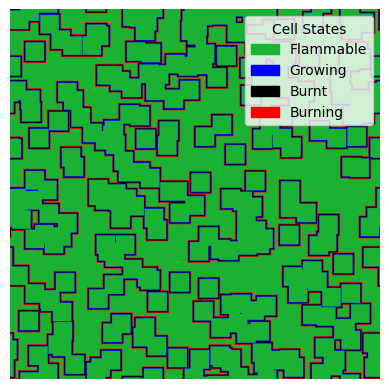

In [42]:
steps = 15

# Define a 4 dimensional board tracking each aspect
board_size = (4, 500, 500)
large_board = np.zeros(shape=board_size)

large_board[state_conversion['flammable']] = np.ones((board_size[1],board_size[2]))
large_board[state_conversion['burning']] = start_fire(board_size, 0.001)

for i in range(steps):
    large_board = step(large_board)
    plot_board(large_board)
    plt.pause(0.05)  # Adjust pause duration if you want to slow down or speed up the animation
    clear_output(wait=True)